In [3]:
#텐서
import torch
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
y = torch.FloatTensor([[1,2,3], [4,5,6], [7,8,9]])
print("x =", x)
print("y =", y)

print("Size:", x.size())
print("Shape:", x.shape)
print("차원(랭크):", x.ndimension())

x0 = torch.unsqueeze(x, 0)
x1 = torch.unsqueeze(x, 1)
x2 = torch.unsqueeze(x, 2)
print("x0.shape:", x0.shape)
print("x1.shape:", x1.shape)
print("x2.shape:", x2.shape)
print("x0 =", x0)
print("x1 =", x1)
print("x2 =", x2)

x3 = torch.squeeze(torch.squeeze(x0))
print("x3 =", x3)
print("x3.shape =", x3.shape)

x4 = x.view(9)
x5 = x.view(1,3,3)
print("x4 =", x4)
print("x5 =", x5)

x = tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
y = tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
차원(랭크): 2
x0.shape: torch.Size([1, 3, 3])
x1.shape: torch.Size([3, 1, 3])
x2.shape: torch.Size([3, 3, 1])
x0 = tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
x1 = tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])
x2 = tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])
x3 = tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
x3.shape = torch.Size([3, 3])
x4 = tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
x5 = tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


In [4]:
#행렬연산
x = torch.FloatTensor([[1,2], [3,4], [5,6]])
w = torch.randn(1,2, dtype=torch.float)
b = torch.randn(3,1, dtype=torch.float)
result = torch.mm(x, torch.t(w)) + b
print(result)

tensor([[-4.4524],
        [-5.5347],
        [-6.2544]])


In [5]:
#autograd
w = torch.tensor(1.0, requires_grad=True)
a = w*3
l = a**2
l.backward()
print('l을 w로 미분한 값은', w.grad)

l을 w로 미분한 값은 tensor(18.)


In [15]:
#rinear regression
import torch
x_train = torch.FloatTensor([[1,2], [3,2], [3,7], [1,1], [1,0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])
W = torch.rand(2,1)
b = torch.rand(1,1)
lr = 0.01

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.mm(x_train, W) + b
  cost = torch.mean((hypothesis - y_train) ** 2)

  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad

  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {}, b: {}'.format(epoch,
    cost.item(), W.squeeze(), b))
  x_test = torch.FloatTensor([[5,10]])

test_result = torch.mm(x_test, W) + b
print(test_result.item())

epoch: 0, cost: 37.555271, W: tensor([1.0299, 1.3277]), b: tensor([[0.9726]])
epoch: 100, cost: 1.893972, W: tensor([0.5075, 3.1565]), b: tensor([[-1.0717]])
epoch: 200, cost: 0.924439, W: tensor([0.8046, 3.2035]), b: tensor([[-1.9875]])
epoch: 300, cost: 0.474458, W: tensor([1.1288, 3.1562]), b: tensor([[-2.5671]])
epoch: 400, cost: 0.243825, W: tensor([1.3739, 3.1132]), b: tensor([[-2.9739]])
epoch: 500, cost: 0.125306, W: tensor([1.5510, 3.0813]), b: tensor([[-3.2645]])
epoch: 600, cost: 0.064397, W: tensor([1.6781, 3.0583]), b: tensor([[-3.4728]])
epoch: 700, cost: 0.033095, W: tensor([1.7692, 3.0418]), b: tensor([[-3.6220]])
epoch: 800, cost: 0.017008, W: tensor([1.8345, 3.0299]), b: tensor([[-3.7290]])
epoch: 900, cost: 0.008741, W: tensor([1.8814, 3.0215]), b: tensor([[-3.8058]])
epoch: 1000, cost: 0.004492, W: tensor([1.9150, 3.0154]), b: tensor([[-3.8607]])
epoch: 1100, cost: 0.002309, W: tensor([1.9390, 3.0110]), b: tensor([[-3.9002]])
epoch: 1200, cost: 0.001186, W: tensor([

In [17]:
#sklearn
from sklearn.linear_model import LinearRegression
x = [[1,2], [3,2], [3,7], [1,1], [1,0]]
y = [[4], [8], [23], [1], [-2]]
lr = LinearRegression() # 모델 생성
lr.fit(x, y) # 학습 (피팅)
print(lr.coef_, lr.intercept_)

print(lr.predict([[5,10]]))

[[2. 3.]] [-4.]
[[36.]]


In [19]:
#logistic regression
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(-y_train * torch.log(hypothesis)
  -(1 - y_train) * torch.log(1 - hypothesis))
  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad
  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(
    epoch, cost.item(), W.squeeze(), b.squeeze()))

x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971979, b: 9.004180
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381528, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

In [21]:
#optimizer
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0
optimizer = torch.optim.SGD([W,b], lr=1.0)
#optimizer = torch.optim.Adam([W,b], lr=1.0)
#optimizer = torch.optim.Adadelta([W,b])
#optimizer = torch.optim.Adagrad([W,b])
#optimizer = torch.optim.RMSprop([W,b])

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(-y_train * torch.log(hypothesis)
  -(1 - y_train) * torch.log(1 - hypothesis))
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(
    epoch, cost.item(), W.squeeze(), b.squeeze()))

x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971979, b: 9.004180
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381528, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

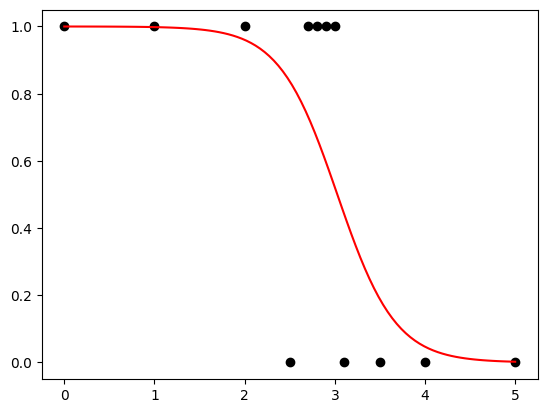

In [22]:
#matplotlib
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train, c="black")
X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X, Y, c="#ff0000")
plt.show()

In [26]:
#sklearn logistic regression
from sklearn.linear_model import LogisticRegression
x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] # 입력 shape이 pytorch에서와 다름에 주의!
model = LogisticRegression(penalty=None) # penalty (or regularization)은 추후 설명
model.fit(x_train, y_train)
#W와 b에 해당하는 값 출력
print(model.coef_, model.intercept_)
# 새로운 x값이 주어질 때 y값 예측해보기
x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)
print(test_result)


[[-3.10385806]] [9.39776831]
[0 1]


In [32]:
#softmax
import torch
x_train = torch.FloatTensor([ [1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5],
 [1,2,5,6], [1,6,6,6], [1,7,7,7] ])
y_train = torch.FloatTensor([ [0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0],
 [1,0,0], [1,0,0] ])

W = torch.randn(4, 3, requires_grad=True)
b = torch.randn(1, 3, requires_grad=True)
optimizer = torch.optim.Adam([W,b], lr=0.1)

for epoch in range(3001):
  hypothesis = torch.softmax(torch.mm(x_train, W)+b, dim=1)
  cost = -torch.mean(torch.sum(y_train * torch.log(hypothesis), dim=1))
  hypothesis = (torch.mm(x_train, W)+b).softmax(dim=1)
  cost = -(y_train * torch.log(hypothesis)).sum(dim=1).mean()
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 300 == 0:
    print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

W.requires_grad_(False)
b.requires_grad_(False)
x_test = torch.FloatTensor([[1,11,10,9], [1,3,4,3], [1,1,0,1]])
test_all = torch.softmax(torch.mm(x_test, W)+b, dim=1)
print(test_all)
print(torch.argmax(test_all, dim=1))


epoch: 0, cost: 3.808313
epoch: 300, cost: 0.114236
epoch: 600, cost: 0.048244
epoch: 900, cost: 0.026486
epoch: 1200, cost: 0.016680
epoch: 1500, cost: 0.011409
epoch: 1800, cost: 0.008239
epoch: 2100, cost: 0.006178
epoch: 2400, cost: 0.004763
epoch: 2700, cost: 0.003749
epoch: 3000, cost: 0.002998
tensor([[1.0000e+00, 1.7465e-18, 4.6994e-37],
        [1.8722e-02, 7.8617e-01, 1.9510e-01],
        [9.3746e-33, 1.7410e-11, 1.0000e+00]])
tensor([0, 1, 2])


In [34]:
#improve softmax
import torch.nn.functional as F
import torch.nn as nn

x_train = torch.FloatTensor([ [1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5],
 [1,2,5,6], [1,6,6,6], [1,7,7,7] ])
y_train = torch.LongTensor([2,2,2,1,1,1,0,0])

model = nn.Linear(4,3)
optimizer = torch.optim.Adam(model.parameters(),lr=1)

for epoch in range(3001):
  z = model(x_train)
  cost = F.cross_entropy(z, y_train)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 300 == 0:
    print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))


epoch: 0, cost: 2.383127
epoch: 300, cost: 0.030333
epoch: 600, cost: 0.012281
epoch: 900, cost: 0.006688
epoch: 1200, cost: 0.004211
epoch: 1500, cost: 0.002885
epoch: 1800, cost: 0.002087
epoch: 2100, cost: 0.001568
epoch: 2400, cost: 0.001211
epoch: 2700, cost: 0.000954
epoch: 3000, cost: 0.000764


In [35]:
#sklearn softmax
import numpy as np
from sklearn.linear_model import LogisticRegression
x_train = np.array([ [1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5],
 [1,2,5,6], [1,6,6,6], [1,7,7,7] ])
# y에 0, 1, 2 등 둘 이상의 class가 존재 => softmax regression
y_train = np.array([ 2, 2, 2, 1, 1, 1, 0, 0 ])
logistic = LogisticRegression() # 모델 생성
logistic.fit(x_train, y_train) # 학습
pred = logistic.predict([[1,11,10,9], [1,3,4,3], [1,1,0,1]]) # test case (값 예측)
print(pred) # 출력

[0 2 2]
